In [1]:
import pandas as pd
import seaborn as sns
import new_lib as nl
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split
import acquire
import warnings
warnings.filterwarnings("ignore")
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [2]:
telco = acquire.get_telco_data(nl.get_db_url)
telco = telco.iloc[:, 1:]
telco = telco.drop(['gender', 'senior_citizen', 'partner', 'phone_service', 'tech_support', 'streaming_tv', 
                    'streaming_movies', 'paperless_billing', 'internet_service_type', 'online_security', 'online_backup', 
                    'device_protection', 'internet_service_type_id', 'customer_id', 'contract_type', 'payment_type', 'multiple_lines'], axis =1)
telco

# Aquiring the Telco data and dropping the Unnamed 0 column to give a dataframe containing the dataset

,payment_type_id,contract_type_id,dependents,tenure,monthly_charges,total_charges,churn
0,2,2,Yes,9,65.60,593.3,No
1,2,1,No,9,59.90,542.4,No
2,1,1,No,4,73.90,280.85,Yes
3,1,1,No,13,98.00,1237.85,Yes
4,2,1,No,3,83.90,267.4,Yes
...,...,...,...,...,...,...,...
7038,2,2,No,13,55.15,742.9,No
7039,1,1,No,22,85.10,1873.7,Yes
7040,2,1,No,2,50.30,92.75,No
7041,2,3,Yes,67,67.85,4627.65,No


In [3]:
telco = telco.dropna()
telco.total_charges = telco.total_charges.replace(' ', 0).astype(float)
# Dropping any null values and converting all the remaining numbers into floats
# Makes it easier to use stats to ttest the charges and churn

In [4]:
telco.dependents = np.where(telco.dependents == 'Yes', 1, 0)

In [5]:
telco

,payment_type_id,contract_type_id,dependents,tenure,monthly_charges,total_charges,churn
0,2,2,1,9,65.60,593.30,No
1,2,1,0,9,59.90,542.40,No
2,1,1,0,4,73.90,280.85,Yes
3,1,1,0,13,98.00,1237.85,Yes
4,2,1,0,3,83.90,267.40,Yes
...,...,...,...,...,...,...,...
7038,2,2,0,13,55.15,742.90,No
7039,1,1,0,22,85.10,1873.70,Yes
7040,2,1,0,2,50.30,92.75,No
7041,2,3,1,67,67.85,4627.65,No


In [6]:
telco.multiple_lines = np.where(telco.multiple_lines == 'Yes', 1, 0)
telco
# Unecessary code

AttributeError: 'DataFrame' object has no attribute 'multiple_lines'

In [7]:
train, validate, test, X_train, y_train, X_val, y_val, X_test, y_test = nl.train_vailidate_test_split(telco, 'churn')
# Creating splits for the data using custom libraray function

In [8]:
baseline = len(train[train.churn == 'No'])/ len(train)
baseline
# creating a baseline for the data

0.7347197565305605

In [9]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3943 entries, 1320 to 1124
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   payment_type_id   3943 non-null   int64  
 1   contract_type_id  3943 non-null   int64  
 2   dependents        3943 non-null   int64  
 3   tenure            3943 non-null   int64  
 4   monthly_charges   3943 non-null   float64
 5   total_charges     3943 non-null   float64
dtypes: float64(2), int64(4)
memory usage: 215.6 KB


In [10]:
train_tree = DecisionTreeClassifier(max_depth=6, random_state=77)
# creating a decision tree model

In [53]:
train_tree = train_tree.fit(X_train, y_train)
train_tree
# fitting the decision tree model

DecisionTreeClassifier(max_depth=6, random_state=77)

[Text(0.561875, 0.9285714285714286, 'contract_type_id <= 1.5\ngini = 0.39\nsamples = 3943\nvalue = [2897, 1046]\nclass = No'),
 Text(0.29125, 0.7857142857142857, 'monthly_charges <= 67.6\ngini = 0.49\nsamples = 2173\nvalue = [1240, 933]\nclass = No'),
 Text(0.1425, 0.6428571428571429, 'tenure <= 4.5\ngini = 0.415\nsamples = 899\nvalue = [635, 264]\nclass = No'),
 Text(0.08, 0.5, 'monthly_charges <= 22.275\ngini = 0.495\nsamples = 350\nvalue = [193, 157]\nclass = No'),
 Text(0.04, 0.35714285714285715, 'total_charges <= 37.0\ngini = 0.413\nsamples = 127\nvalue = [90, 37]\nclass = No'),
 Text(0.02, 0.21428571428571427, 'total_charges <= 20.1\ngini = 0.472\nsamples = 84\nvalue = [52, 32]\nclass = No'),
 Text(0.01, 0.07142857142857142, 'gini = 0.408\nsamples = 42\nvalue = [30, 12]\nclass = No'),
 Text(0.03, 0.07142857142857142, 'gini = 0.499\nsamples = 42\nvalue = [22, 20]\nclass = No'),
 Text(0.06, 0.21428571428571427, 'monthly_charges <= 20.9\ngini = 0.206\nsamples = 43\nvalue = [38, 5]\n

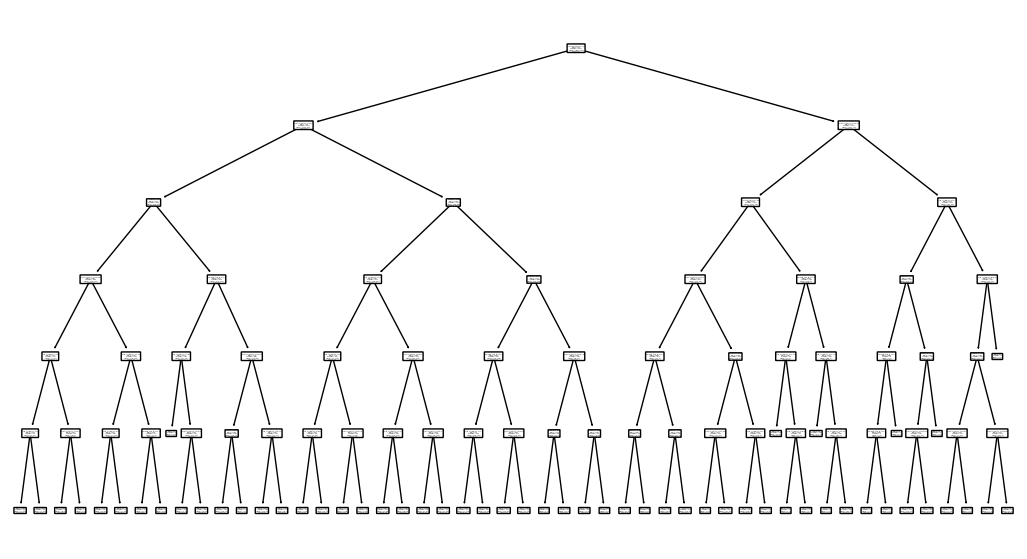

In [12]:
plt.figure(figsize=(13, 7))
plot_tree(train_tree, feature_names=X_train.columns, class_names=train_tree.classes_, rounded=True)
#creating the decision tree visualization

In [13]:
# make prediction on train obeservations

y_pred = train_tree.predict(X_train)
y_pred[0:7]


array(['No', 'No', 'No', 'No', 'No', 'No', 'No'], dtype=object)

In [14]:
y_pred_proba = train_tree.predict_proba(X_train)
y_pred_proba[0:7]
# probabilities for the decision tree

array([[0.52380952, 0.47619048],
       [0.9047619 , 0.0952381 ],
       [0.90277778, 0.09722222],
       [1.        , 0.        ],
       [0.98846154, 0.01153846],
       [0.66803279, 0.33196721],
       [1.        , 0.        ]])

In [15]:
train_tree.score(X_train, y_train)
# accuracy score for the decision tree

0.8080142023839716

In [16]:
# confusion matrix

confusion_matrix(y_train, y_pred)


array([[2589,  308],
       [ 449,  597]])

In [17]:
labels = sorted(y_train.unique())
pd.DataFrame(confusion_matrix(y_train, y_pred), index=labels, columns=labels)
#visualizing the matrix in a dataframe

,No,Yes
No,2589,308
Yes,449,597


In [18]:
print(classification_report(y_train, y_pred))
# classification report

              precision    recall  f1-score   support

          No       0.85      0.89      0.87      2897
         Yes       0.66      0.57      0.61      1046

    accuracy                           0.81      3943
   macro avg       0.76      0.73      0.74      3943
weighted avg       0.80      0.81      0.80      3943



In [52]:
train_tree.score(X_test, y_test)
# test set accuracy score for the decision tree

0.7885024840312278

In [20]:
y_pred = train_tree.predict(X_val)
print(classification_report(y_val, y_pred))
# validation classification report

              precision    recall  f1-score   support

          No       0.84      0.89      0.86      1242
         Yes       0.63      0.54      0.59       449

    accuracy                           0.80      1691
   macro avg       0.74      0.71      0.72      1691
weighted avg       0.79      0.80      0.79      1691



In [46]:
rf = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=3,
                            n_estimators=100,
                            max_depth=6, 
                            random_state=77)
# creating a random forest model

In [54]:
rf.fit(X_train, y_train)
# fitting a model

RandomForestClassifier(max_depth=6, min_samples_leaf=3, random_state=77)

In [48]:
print(rf.feature_importances_)
# feature importance

[0.1108129  0.28307033 0.01174151 0.25036468 0.21138641 0.13262416]


In [49]:
y_pred = rf.predict(X_train)
# forest predicitions

In [51]:
rf.score(X_test, y_test)
# accuracy score

0.7885024840312278

In [26]:
labels = sorted(y_train.unique())
pd.DataFrame(confusion_matrix(y_train, y_pred), index=labels, columns=labels)
# confusion matrix as a dataframe

,No,Yes
No,2665,232
Yes,502,544


In [27]:
print(classification_report(y_train, y_pred))
# classification report

              precision    recall  f1-score   support

          No       0.84      0.92      0.88      2897
         Yes       0.70      0.52      0.60      1046

    accuracy                           0.81      3943
   macro avg       0.77      0.72      0.74      3943
weighted avg       0.80      0.81      0.80      3943



In [28]:
rf.score(X_val, y_val)
# validate accuracy score

0.8001182732111177

In [29]:
logit = LogisticRegression(C=1, random_state=77, intercept_scaling=1, solver='lbfgs')
# creating a logistical regression

In [30]:
logit.fit(X_train, y_train)
# fitting the model

LogisticRegression(C=1, random_state=77)

In [31]:
print('Coefficient: \n', logit.coef_)
print('Intercept: \n', logit.intercept_)

Coefficient: 
 [[-1.46646538e-01 -9.45409088e-01 -2.72624723e-01 -4.82234836e-02
   2.68130384e-02  1.42846707e-04]]
Intercept: 
 [-0.19265369]


In [32]:
y_pred = logit.predict(X_train)
# preditctions

In [33]:
logit.score(X_train, y_train)
# accuracy score

0.7895003804209992

In [34]:
labels = sorted(y_train.unique())
pd.DataFrame(confusion_matrix(y_train, y_pred), index=labels, columns=labels)
# confusion matrix

,No,Yes
No,2596,301
Yes,529,517


In [35]:
print(classification_report(y_train, y_pred))
# classification report

              precision    recall  f1-score   support

          No       0.83      0.90      0.86      2897
         Yes       0.63      0.49      0.55      1046

    accuracy                           0.79      3943
   macro avg       0.73      0.70      0.71      3943
weighted avg       0.78      0.79      0.78      3943



In [45]:
train_tree.score(X_test, y_test)
# test set accuracy score

0.7885024840312278

In [44]:
rf.score(X_test, y_test)
# test set accuracy score

0.7885024840312278

In [38]:
logit.score(X_test, y_test)
# test set accuracy score

0.7877927608232789

In [39]:
telco_c = acquire.get_telco_data(nl.get_db_url)
telco_c = telco_c.iloc[:, 1:]
telco_c = telco_c.drop(['gender', 'senior_citizen', 'partner', 'phone_service', 'tech_support', 'streaming_tv', 
                    'streaming_movies', 'paperless_billing', 'internet_service_type', 'online_security', 'online_backup', 
                    'device_protection', 'internet_service_type_id', 'payment_type_id', 'contract_type_id', 'dependents', 
                    'tenure', 'multiple_lines', 'monthly_charges', 'total_charges', 'churn', 'contract_type', 'payment_type']
                   , axis =1)
telco_c
# prepping a new data frame to convert to the csv file

,customer_id
0,0002-ORFBO
1,0003-MKNFE
2,0004-TLHLJ
3,0011-IGKFF
4,0013-EXCHZ
...,...
7038,9987-LUTYD
7039,9992-RRAMN
7040,9992-UJOEL
7041,9993-LHIEB


In [40]:
churn_prob = train_tree.predict_proba(X_test)
churn_prob = pd.DataFrame(churn_prob)
churn_prob.drop(columns = 1)
# grabbing retention probability

,0
0,0.876984
1,0.780220
2,0.668033
3,1.000000
4,1.000000
...,...
1404,1.000000
1405,0.683453
1406,1.000000
1407,0.583333


In [41]:
pred_churn = train_tree.predict(X_test)
pred_churn = pd.DataFrame(pred_churn)
pred_churn = pred_churn.rename(columns ={0 : 'Churn'})
# predicting the churn in a yes no format

In [42]:
predictions = pd.concat([telco_c, churn_prob, pred_churn], axis = 1).dropna().drop(columns = 1)
predictions = predictions.rename(columns = {0 : 'Retention Chance'})
predictions
#concat the dataframe together to make a prediction csv

,customer_id,Retention Chance,Churn
0,0002-ORFBO,0.876984,No
1,0003-MKNFE,0.780220,No
2,0004-TLHLJ,0.668033,No
3,0011-IGKFF,1.000000,No
4,0013-EXCHZ,1.000000,No
...,...,...,...
1404,2075-PUEPR,1.000000,No
1405,2075-RMJIK,0.683453,No
1406,2077-DDHJK,1.000000,No
1407,2077-MPJQO,0.583333,No


In [43]:
predictions.to_csv('final_predictions.csv')
#creates the csv file